In [1]:
# Codeblock 1
import os
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Codeblock 2
def load_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #1
    return image

def show_image(image):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return

In [3]:
# Codeblock 3
filenames = os.listdir('templates')
images = [load_image(f'templates/{filename}') for filename in filenames]

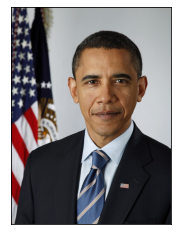

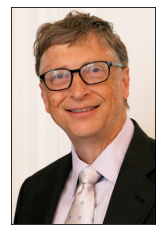

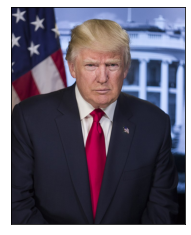

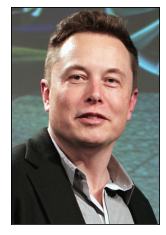

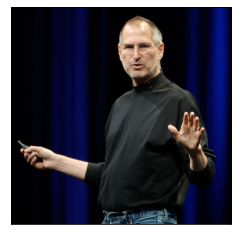

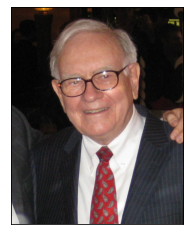

In [4]:
# Codeblock 4
show_image(images[0])
show_image(images[1])
show_image(images[2])
show_image(images[3])
show_image(images[4])
show_image(images[5])

In [5]:
# Codeblock 5
class Face:
    def __init__(self, bounding_box, cropped_face, name, feature_vector):
        self.bounding_box = bounding_box      #1
        self.cropped_face = cropped_face      #2
        self.name = name                      #3
        self.feature_vector = feature_vector  #4

In [6]:
# Codeblock 6
def create_database(filenames, images):    #1
    faces = []
    for filename, image in tqdm(zip(filenames, images), total=len(filenames)):
        loc = face_recognition.face_locations(image, model='hog')[0]  #2
        vec = face_recognition.face_encodings(image, [loc], 
                                              num_jitters=20)[0]      #3
        
        top, right, bottom, left = loc    #4
        
        cropped_face = image[top:bottom, left:right]    #5
        
        face = Face(bounding_box=loc, cropped_face=cropped_face, 
                    name=filename.split('.')[0], feature_vector=vec)  #6

        faces.append(face)    #7
    
    return faces

In [7]:
# Codeblock 7
faces = create_database(filenames, images)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:42<00:00, 17.04s/it]


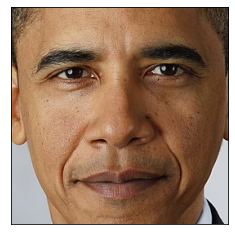

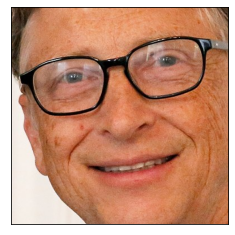

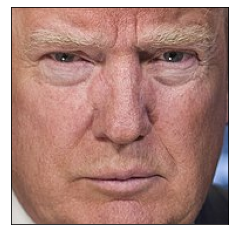

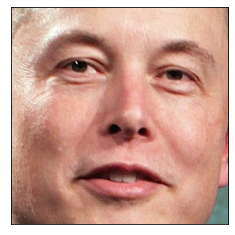

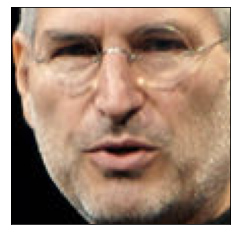

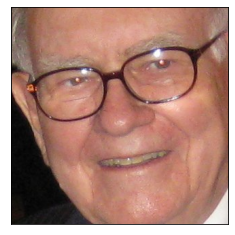

In [8]:
# Codeblock 8
show_image(faces[0].cropped_face)
show_image(faces[1].cropped_face)
show_image(faces[2].cropped_face)
show_image(faces[3].cropped_face)
show_image(faces[4].cropped_face)
show_image(faces[5].cropped_face)

In [9]:
# Codeblock 9
print(faces[0].bounding_box)
print(faces[0].name)
print(faces[0].feature_vector)

(231, 527, 498, 260)
barack_obama
[-8.88339281e-02  1.23026513e-01  6.12432621e-02 -3.96122672e-02
  9.57850646e-03 -6.96722139e-03 -1.01592794e-01 -6.79960847e-02
  1.82988033e-01 -1.43802300e-01  2.62200743e-01  7.81719312e-02
 -2.16197833e-01 -1.25552505e-01  9.08505470e-02  1.38886318e-01
 -2.23242790e-01 -7.72727132e-02 -1.18546084e-01 -5.46607450e-02
  1.58221737e-04  5.87422820e-03  8.80890340e-02  4.77300771e-02
 -8.61454979e-02 -4.01944548e-01 -7.56436810e-02 -1.45731732e-01
 -5.78002539e-03 -1.73809603e-01 -1.04188018e-01 -2.90247630e-02
 -1.64056852e-01 -9.52274129e-02 -1.28676984e-02 -5.01060532e-03
 -1.14327027e-02 -1.12391151e-02  1.74150825e-01  5.06859533e-02
 -1.62676141e-01  6.42333478e-02 -6.17908686e-03  2.32218608e-01
  2.60446399e-01  1.12247169e-01  2.05207430e-02 -6.04575686e-02
  1.19950257e-01 -2.12116957e-01  5.95667735e-02  1.62294790e-01
  9.40579399e-02  1.39665250e-02  1.10359468e-01 -1.83792815e-01
 -2.36132089e-02  8.06628987e-02 -9.13201496e-02  5.2745

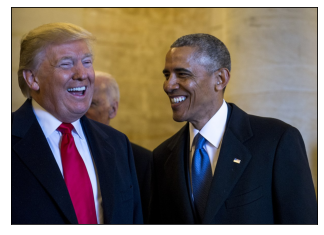

In [10]:
# Codeblock 10
image_test = load_image('test/test1.jpg')
show_image(image_test)

In [11]:
# Codeblock 11
def detect_faces(image_test, faces, threshold=0.6):    #1
    locs_test = face_recognition.face_locations(image_test, model='hog')  #2
    vecs_test = face_recognition.face_encodings(image_test, locs_test, 
                                                num_jitters=1)            #3
    
    for loc_test, vec_test in zip(locs_test, vecs_test):    #4
        distances = []
        for face in faces:
            distance = face_recognition.face_distance([vec_test], 
                                                      face.feature_vector)  #5
            distances.append(distance)
            
        if np.min(distances) > threshold:  #6
            pred_name = 'unknown'
        else:
            pred_index = np.argmin(distances)    #7
            pred_name = faces[pred_index].name
        
        image_test = draw_bounding_box(image_test, loc_test)
        image_test = draw_name(image_test, loc_test, pred_name)
    
    return image_test

In [12]:
# Codeblock 12
def draw_bounding_box(image_test, loc_test):
    top, right, bottom, left = loc_test
    
    line_color = (0, 255, 0)
    line_thickness = 2
    
    cv2.rectangle(image_test, (left, top), (right, bottom), 
                  line_color, line_thickness)

    return image_test

def draw_name(image_test, loc_test, pred_name):
    top, right, bottom, left = loc_test 
    
    font_style = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    font_color = (0, 0, 255)
    font_thickness = 3
    
    text_size, _ = cv2.getTextSize(pred_name, font_style, font_scale, font_thickness)
    
    bg_top_left = (left, top-text_size[1])
    bg_bottom_right = (left+text_size[0], top)
    line_color = (0, 255, 0)
    line_thickness = -1

    cv2.rectangle(image_test, bg_top_left, bg_bottom_right, 
                  line_color, line_thickness)   

    cv2.putText(image_test, pred_name, (left, top), font_style, font_scale, font_color, font_thickness)
    
    return image_test

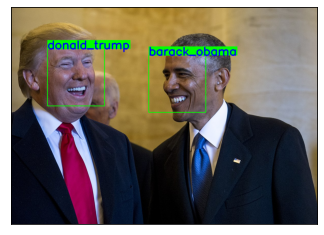

In [13]:
# Codeblock 13
show_image(detect_faces(image_test, faces))

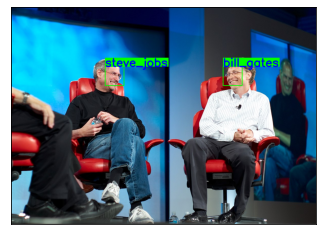

In [14]:
# Codeblock 14
show_image(detect_faces(load_image('test/test2.jpg'), faces))

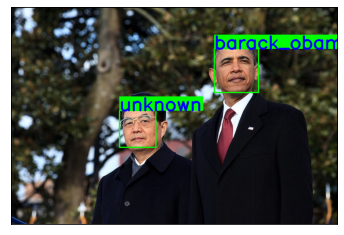

In [15]:
# Codeblock 15
show_image(detect_faces(load_image('test/test3.jpg'), faces))

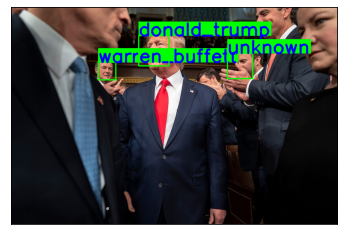

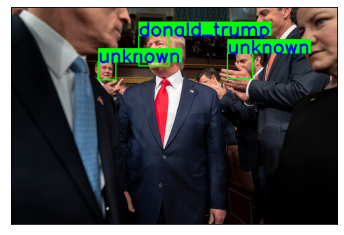

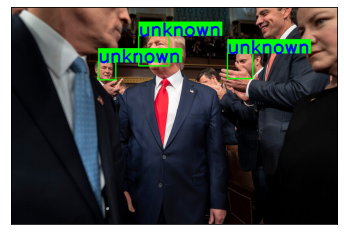

In [16]:
# Codeblock 16
show_image(detect_faces(load_image('test/test4.jpg'), faces, threshold=0.6))
show_image(detect_faces(load_image('test/test4.jpg'), faces, threshold=0.5))
show_image(detect_faces(load_image('test/test4.jpg'), faces, threshold=0.2))